# Predicting Sales Opportunities - Part 2 Predict Amount
### General Assembly Capstone Project
by Daryl Cheong

# Goal - Predict Opportunity Amount
All businesses are interested in knowing how much revenue they can make for each transaction, therefore being able to estimate the value of a sales opportunity would be very useful. For this project, the objective will be to predict the values in the **Amount** column and this will be accomplished through the use of Regression algorithms. But first, we will first need to prepare our data for model generation.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style('whitegrid')

pd.set_option('display.max_columns', None)

In [3]:
# Load pickle data.

pickle_in = open("cars2.pickle","rb")
cars2 = pickle.load(pickle_in)
print cars2.shape
cars2.head()

(78024, 45)


,Amount,Elapsed_Days,Stage_Change,Total_Days,Ratio_Identify,Ratio_Validate,Ratio_Qualify,Result,Client_Past,Supplies_Sub_Electronics,Supplies_Sub_Exterior,Supplies_Sub_Garage_Car_Care,Supplies_Sub_Interior,Supplies_Sub_Motorcycle_Parts,Supplies_Sub_Performance,Supplies_Sub_Replacement,Supplies_Sub_Shelters_RV,Supplies_Sub_Tires_Wheels,Supplies_Sub_Towing_Hitches,Region_Midwest,Region_Northeast,Region_Northwest,Region_Pacific,Region_Southeast,Region_Southwest,Market_Other,Market_Reseller,Market_Telecoverage,Market_Telesales,Client_Revenue_250K_to_500K,Client_Revenue_500K_to_1M,Client_Revenue_Above_1M,Client_Revenue_Below_100K,Client_Employee_1K_to_5K,Client_Employee_5K_to_15K,Client_Employee_Above_25K,Client_Employee_Below_1K,Competitor_None,Competitor_Unknown,Size_20K_to_30K,Size_30K_to_40K,Size_40K_to_50K,Size_50K_to_60K,Size_Above_60K,Size_Below_10K
0,0,76,13,104,0.69636,0.113985,0.154215,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1,0,63,2,163,0.00000,1.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,7750,24,7,82,1.00000,0.000000,0.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
3,0,16,5,124,1.00000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,69756,69,11,91,0.00000,0.141125,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0


# 2.1 - Feature Selection
We will begin by performing feature selection by using the **statsmodels** python package to analyse the p-values of each feature. Any features with a p-value or 0.05 and higher will be deemed insignificant and thus will be dropped. Using this method, 20 out of 44 features were removed.

In [4]:
# Analyze feature p-values

import patsy
import statsmodels.api as sm

target = 'Amount ~ '
predictor = ' + '.join(cars2.columns[1:])
formula = target + predictor

y, X = patsy.dmatrices(formula, data=cars2, return_type='dataframe')

y = y.values.ravel()

model = sm.OLS(y, X). fit()
model.summary()

/Users/darylcheong/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 1.867e+04
Date:                Tue, 20 Feb 2018   Prob (F-statistic):               0.00
Time:                        13:47:41   Log-Likelihood:            -9.3593e+05
No. Observations:               78024   AIC:                         1.872e+06
Df Residuals:                   77979   BIC:                         1.872e+06
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      1.136e+04   1368.430      8.299      0.000    8674.563     1.4e+04
Elapsed_Days                      1.4440      6.176      0.234      0.815     -10.660      13.548
Stage_Change                    358.8671    109.685      3.272      0.001     143.885     573.849
Total_Days                       10.9883     10.075      1.091      0.275      -8.758      30.735
Ratio_Identify                 -805.9517    592.933     -1.359      0.174   -1968.097     356.194
Ratio_Validate                 -389.9444    508.501     -0.767      0.443   -1386.603     606.714
Ratio_Qualify                  2211.0454    606.676      3.645      0.000    1021.964    3400.126
Result                         4340.6075    404.780     10.723      0.000    3547.240    5133.975
Client_Past                    2258.1042    481.669      4.688      0.000    1314.037    3202.172
Supplies_Sub_Electronics       -361.6865   2378.375     -0.152      0.879   -5023.288    4299.915
Supplies_Sub_Exterior           470.2335    532.491      0.883      0.377    -573.445    1513.912
Supplies_Sub_Garage_Car_Care  -1226.9044    585.000     -2.097      0.036   -2373.500     -80.309
Supplies_Sub_Interior          1823.7156    672.713      2.711      0.007     505.202    3142.229
Supplies_Sub_Motorcycle_Parts  -933.9733    528.117     -1.768      0.077   -1969.080     101.133
Supplies_Sub_Performance       2133.3860    881.140      2.421      0.015     406.357    3860.415
Supplies_Sub_Replacement       -926.2319    613.077     -1.511      0.131   -2127.860     275.396
Supplies_Sub_Shelters_RV       2814.9481    575.076      4.895      0.000    1687.802    3942.094
Supplies_Sub_Tires_Wheels     -2380.1017   1644.644     -1.447      0.148   -5603.594     843.391
Supplies_Sub_Towing_Hitches    -788.5598    759.493     -1.038      0.299   -2277.163     700.043
Region_Midwest                  594.4745    530.722      1.120      0.263    -445.738    1634.686
Region_Northeast               -896.7538    648.349     -1.383      0.167   -2167.514     374.006
Region_Northwest               2381.7733    610.482      3.901      0.000    1185.231    3578.315
Region_Pacific                 5530.1909    575.989      9.601      0.000    4401.256    6659.126
Region_Southeast               1765.6885    613.857      2.876      0.004     562.532    2968.845
Region_Southwest              -2934.5891    631.317     -4.648      0.000   -4171.967   -1697.211
Market_Other                   -144.6378    779.553     -0.186      0.853   -1672.557    1383.282
Market_Reseller                1794.4462    348.069      5.155      0.000    1112.232    2476.660
Market_Telecoverage           -4999.2625   1601.748     -3.121      0.002   -8138.679   -1859.846
Market_Telesales              -1823.2823    8

In [5]:
# Drop statistically insignificant features with p-values higher than 0.05.

cars3 = cars2.drop(['Ratio_Identify', 'Supplies_Sub_Electronics', 'Supplies_Sub_Garage_Car_Care', 'Market_Other',
                    'Client_Revenue_500K_to_1M', 'Client_Revenue_250K_to_500K', 'Supplies_Sub_Towing_Hitches',
                    'Client_Revenue_Above_1M', 'Client_Revenue_Below_100K', 'Client_Employee_1K_to_5K',
                    'Client_Employee_5K_to_15K', 'Client_Employee_Below_1K', 'Client_Employee_Above_25K',
                    'Supplies_Sub_Tires_Wheels', 'Region_Midwest', 'Elapsed_Days', 'Supplies_Sub_Replacement',
                    'Supplies_Sub_Motorcycle_Parts', 'Ratio_Validate', 'Total_Days'],
                   axis=1)

In [6]:
# Significant features.

target = 'Amount ~ '
predictor = ' + '.join(cars3.columns[1:])
formula = target + predictor

y, X = patsy.dmatrices(formula, data=cars3, return_type='dataframe')

y = y.values.ravel()

model = sm.OLS(y, X). fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 3.424e+04
Date:                Tue, 20 Feb 2018   Prob (F-statistic):               0.00
Time:                        13:47:41   Log-Likelihood:            -9.3594e+05
No. Observations:               78024   AIC:                         1.872e+06
Df Residuals:                   77999   BIC:                         1.872e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1.173e+04    630.642     18.603      0.000    1.05e+04     1.3e+04
Stage_Change               377.8431     99.719      3.789      0.000     182.394     573.292
Ratio_Qualify             2609.8513    444.099      5.877      0.000    1739.419    3480.283
Result                    4330.7292    378.233     11.450      0.000    3589.395    5072.064
Client_Past               2330.5863    479.434      4.861      0.000    1390.898    3270.275
Supplies_Sub_Exterior     1249.7265    380.685      3.283      0.001     503.586    1995.867
Supplies_Sub_Interior     2576.6569    565.864      4.553      0.000    1467.566    3685.747
Supplies_Sub_Performance  2913.0571    801.016      3.637      0.000    1343.069    4483.045
Supplies_Sub_Shelters_RV  3569.8095    449.609      7.940      0.000    2688.579    4451.040
Region_Northeast         -1320.6836    514.883     -2.565      0.010   -2329.851    -311.516
Region_Northwest          1942.7943    464.776      4.180      0.000    1031.836    2853.753
Region_Pacific            5150.2130    407.335     12.644      0.000    4351.839    5948.587
Region_Southeast          1363.2653    471.789      2.890      0.004     438.562    2287.969
Region_Southwest         -3228.3640    494.382     -6.530      0.000   -4197.349   -2259.379
Market_Reseller           1858.1413    324.862      5.720      0.000    1221.413    2494.870
Market_Telecoverage      -5013.7592   1595.846     -3.142      0.002   -8141.609   -1885.909
Market_Telesales         -1712.8644    818.086     -2.094      0.036   -3316.309    -109.420
Competitor_None          -2026.8066    565.100     -3.587      0.000   -3134.399    -919.215
Competitor_Unknown       -1707.5923    419.083     -4.075      0.000   -2528.992    -886.193
Size_20K_to_30K           1.786e+04    480.534     37.175      0.000    1.69e+04    1.88e+04
Size_30K_to_40K            4.82e+04    470.607    102.419      0.000    4.73e+04    4.91e+04
Size_40K_to_50K           1.247e+05    463.367    269.198      0.000    1.24e+05    1.26e+05
Size_50K_to_60K           3.105e+05    669.260    463.923      0.000    3.09e+05    3.12e+05
Size_Above_60K             6.45e+05    914.076    705.611      0.000    6.43e+05    6.47e+05
Size_Below_10K           -1.264e+04    484.984    -26.068      0.000   -1.36e+04   -1.17e+04
==============================================================================
Omnibus:                    45649.746   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1635213.983
Skew:                           2.232   Prob(JB):                         0.00
Kurtosis:                      24.979   Cond. No.                         40.6
==============================================================================

Warn

# 2.2 - Prepare target/predictor variables and train/test sets
To prepare our data, we will use the holdout method to split our dataset. We will use training set that comprises of 70% of the data to train our models, and a testing set of 30% to assess their predictions. 5-fold cross validation will also be applied to the training set for each of our models. 

In [7]:
# Set target y and predictor X.

y = cars3['Amount']
X = cars3.drop('Amount', axis=1)

In [8]:
# Split train/test sets.

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

/Users/darylcheong/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# Scale the data.

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

# 2.3 - Model Generation
Model construction can begin by using the new prepared datasets.

5 different regression algorithms will used to create the models:
1. Linear Regression
2. Lasso Regression
3. Ridge Regression
4. SGD Regression
5. Random Forest Regression

The results for each of the 5 models will be collected and evaluated, before selecting the model that best predicts the opportunity amount.

### 2.3.1 - Model 1 Linear Regression ###

In [10]:
# Implement Linear Regression.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

linreg1 = LinearRegression()

linreg1.fit(Xs_train, y_train)
linreg1_train_score = linreg1.score(Xs_train, y_train)
linreg1_cv_score = np.mean(cross_val_score(linreg1, Xs_train, y_train, cv=5))
linreg1_test_score = linreg1.score(Xs_test, y_test)
y1_pred = linreg1.predict(Xs_test)
linreg1_rmse_score = np.sqrt(metrics.mean_squared_error(y_test, y1_pred))

print 'training score: ' + str(linreg1_train_score)
print 'training CV score: ' + str(linreg1_cv_score)
print 'testing score: ' + str(linreg1_test_score)
print 'RMSE score: ' + str(linreg1_rmse_score)

training score: 0.9135022122305745
training CV score: 0.9134045585820664
testing score: 0.9127836356288029
RMSE score: 39646.546602235816


### 2.3.2 - Model 2 Lasso Regression ###

In [11]:
# Identify optimal Lasso alpha.

from sklearn.linear_model import Lasso, LassoCV

optimal_lasso = LassoCV(n_alphas=1000, cv=5, verbose=1)
optimal_lasso.fit(Xs_train, y_train)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

96.52199707875877


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s finished


In [12]:
# Implement Lasso Regression.

lasso2 = Lasso(alpha=optimal_lasso.alpha_)

lasso2.fit(Xs_train, y_train)
lasso2_train_score = lasso2.score(Xs_train, y_train)
lasso2_cv_score = np.mean(cross_val_score(lasso2, Xs_train, y_train, cv=5))
lasso2_test_score = lasso2.score(Xs_test, y_test)
y2_pred = lasso2.predict(Xs_test)
lasso2_rmse_score = np.sqrt(metrics.mean_squared_error(y_test, y2_pred))

print 'training score: ' + str(lasso2_train_score)
print 'training CV score: ' + str(lasso2_cv_score)
print 'testing score: ' + str(lasso2_test_score)
print 'RMSE score: ' + str(lasso2_rmse_score)

training score: 0.9134835206571735
training CV score: 0.913385820621715
testing score: 0.9127695255477706
RMSE score: 39649.753531148446


### 2.3.3 - Model 3 Ridge Regression ###

In [13]:
# Identify optimal Ridge alpha.

from sklearn.linear_model import Ridge, RidgeCV

ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(Xs_train, y_train)

print optimal_ridge.alpha_

3.18062569279412


In [14]:
# Implement Ridge Regression.

ridge3 = Ridge(alpha=optimal_ridge.alpha_)

ridge3.fit(Xs_train, y_train)
ridge3_train_score = ridge3.score(Xs_train, y_train)
ridge3_cv_score = np.mean(cross_val_score(ridge3, Xs_train, y_train, cv=5))
ridge3_test_score = ridge3.score(Xs_test, y_test)
y3_pred = ridge3.predict(Xs_test)
ridge3_rmse_score = np.sqrt(metrics.mean_squared_error(y_test, y3_pred))

print 'training score: ' + str(ridge3_train_score)
print 'training CV score: ' + str(ridge3_cv_score)
print 'testing score: ' + str(ridge3_test_score)
print 'RMSE score: ' + str(ridge3_rmse_score)

training score: 0.9135022031851683
training CV score: 0.9134045719977415
testing score: 0.9127846248712089
RMSE score: 39646.32175821346


### 2.3.4 - Model 4 SGD Regression ###

In [30]:
# Implement SGD Regression.

from sklearn.linear_model import SGDRegressor

sgd4 = SGDRegressor()

sgd4.fit(Xs_train, y_train)
sgd4_train_score = mlp4.score(Xs_train, y_train)
sgd4_cv_score = np.mean(cross_val_score(sgd4, Xs_train, y_train, cv=5))
sgd4_test_score = mlp4.score(Xs_test, y_test)
y4_pred = sgd4.predict(Xs_test)
sgd4_rmse_score = np.sqrt(metrics.mean_squared_error(y_test, y4_pred))

print 'training score: ' + str(sgd4_train_score)
print 'training CV score: ' + str(sgd4_cv_score)
print 'testing score: ' + str(sgd4_test_score)
print 'RMSE score: ' + str(sgd4_rmse_score)

/Users/darylcheong/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


training score: 0.9128221287497695
training CV score: 0.9127736057580875
testing score: 0.9116501477940345
RMSE score: 40187.22249923098


### 2.3.5 - Model 5 Random Forest Regression ###

In [16]:
# Implement Random Forest Regression.

from sklearn.ensemble import RandomForestRegressor

rfreg5 = RandomForestRegressor()

rfreg5.fit(Xs_train, y_train)
rfreg5_train_score = rfreg5.score(Xs_train, y_train)
rfreg5_cv_score = np.mean(cross_val_score(rfreg5, Xs_train, y_train, cv=5))
rfreg5_test_score = rfreg5.score(Xs_test, y_test)
y5_pred = rfreg5.predict(Xs_test)
rfreg5_rmse_score = np.sqrt(metrics.mean_squared_error(y_test, y5_pred))

print 'training score: ' + str(rfreg5_train_score)
print 'training CV score: ' + str(rfreg5_cv_score)
print 'testing score: ' + str(rfreg5_test_score)
print 'RMSE score: ' + str(rfreg5_rmse_score)

training score: 0.9521200567903615
training CV score: 0.8977956831536377
testing score: 0.8961832181337077
RMSE score: 43255.38241449718


# 2.4 - Model Results Evaluation
With the models completed, we can now compile all the results into a new pandas dataframe, making it easier to compare the results. Graphical representations will also be generated to help visualise the output.

Model performance will be judged based on 2 key criterias:-
1. R^2 score (training, cross validation, testing)
2. Root Mean Squared Error score (RMSE)

We will also compare the feature rankings for each model.

In [31]:
# Consolidate results.

model = ['linear reg', 'lasso reg', 'ridge reg', 'sgd reg', 'rf reg']

training = [linreg1_train_score, lasso2_train_score, ridge3_train_score, sgd4_train_score, rfreg5_train_score]
training = [np.round(x, 4) for x in training]

crossval = [linreg1_cv_score, lasso2_cv_score, ridge3_cv_score, sgd4_cv_score, rfreg5_cv_score]
crossval = [np.round(x, 4) for x in crossval]

testing = [linreg1_test_score, lasso2_test_score, ridge3_test_score, sgd4_test_score, rfreg5_test_score]
testing = [np.round(x, 4) for x in testing]

rmse = [linreg1_rmse_score, lasso2_rmse_score, ridge3_rmse_score, sgd4_rmse_score, rfreg5_rmse_score]
rmse = [np.round(x, 4) for x in rmse]

In [32]:
# Initialize new results dataframe.

reg_results = pd.DataFrame()
reg_results['model'] = model
reg_results['training'] = training
reg_results['cross_val'] = crossval
reg_results['testing'] = testing
reg_results['RMSE'] = rmse

In [33]:
reg_results

,model,training,cross_val,testing,RMSE
0,linear reg,0.9135,0.9134,0.9128,39646.5466
1,lasso reg,0.9135,0.9134,0.9128,39649.7535
2,ridge reg,0.9135,0.9134,0.9128,39646.3218
3,sgd reg,0.9128,0.9128,0.9117,40187.2225
4,rf reg,0.9521,0.8978,0.8962,43255.3824


When conducting evaluation, we are looking for a model with a high R^2 score and low RMSE score. The R^2 score would indicate the goodness of fit of a set of predictions on the actual values, RMSE indicates the magnitude of error between the predicted and actual value in terms of the output value.

Looking at the compiled results, we see that **Linear**, **Lasso** and **Ridge Regression** achieved the highest R^2 scores, and the results were identical. Even their RMSE score was almost the same. On the other hand, the **Random Forest Regression** model performed the worst with the lowest R^2 score and highest RMSE score.

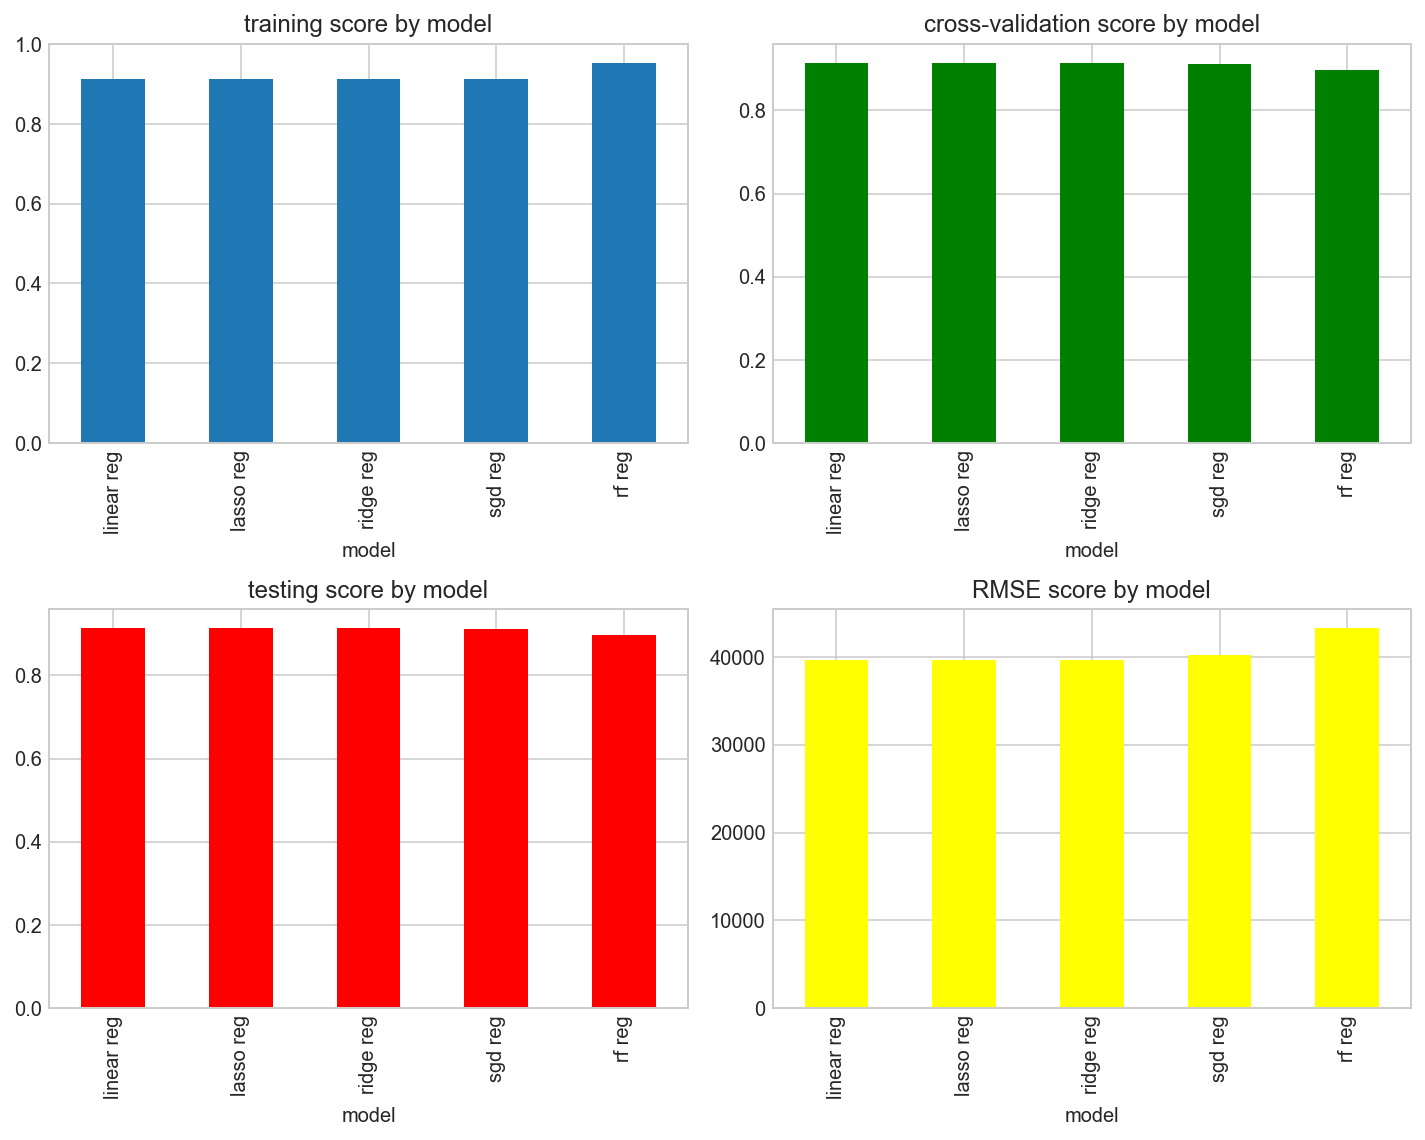

In [34]:
# Visualize training, cross-validation, testing and ROC scores.

fig, ((axis1,axis2),(axis3,axis4)) = plt.subplots(2,2, figsize=(10,8))
reg_results.plot(x='model', y='training', kind='bar', title='training score by model', legend=False, ax=axis1)
reg_results.plot(x='model', y='cross_val', kind='bar', title='cross-validation score by model', legend=False, ax=axis2, color='green')
reg_results.plot(x='model', y='testing', kind='bar', title='testing score by model', legend=False, ax=axis3, color='red')
reg_results.plot(x='model', y='RMSE', kind='bar', title='RMSE score by model', legend=False, ax=axis4, color='yellow')
plt.tight_layout()

In [78]:
# Rank the coefficients from Linear Regression.

linreg_coefs = pd.DataFrame({'linreg_feature': X_train.columns,
                           'linreg_abs_coef': np.abs(linreg1.coef_)})

linreg_coefs = linreg_coefs.sort_values('linreg_abs_coef', ascending=False).reset_index(drop=True)

In [79]:
# Rank the coefficients from Lasso Regression.

lasso_coefs = pd.DataFrame({'lasso_feature': X_train.columns,
                           'lasso_abs_coef': np.abs(lasso2.coef_)})

lasso_coefs = lasso_coefs.sort_values('lasso_abs_coef', ascending=False).reset_index(drop=True)

In [80]:
# Rank the coefficients from Ridge Regression.

ridge_coefs = pd.DataFrame({'ridge_feature': X_train.columns,
                           'ridge_abs_coef': np.abs(ridge3.coef_)})

ridge_coefs = ridge_coefs.sort_values('ridge_abs_coef', ascending=False).reset_index(drop=True)

In [81]:
# Rank the coefficients from SGD Regression.

sgd_coefs = pd.DataFrame({'sgd_feature': X_train.columns,
                           'sgd_abs_coef': np.abs(sgd4.coef_)})

sgd_coefs = sgd_coefs.sort_values('sgd_abs_coef', ascending=False).reset_index(drop=True)

In [82]:
# Rank feature importance from Random Forest Regression.

rfreg_impt = pd.DataFrame({'rf_feature': X_train.columns,
                           'rf_importance': rfreg5.feature_importances_})

rfreg_impt = rfreg_impt.sort_values('rf_importance', ascending=False).reset_index(drop=True)

In [84]:
feature_rank = pd.concat([linreg_coefs, lasso_coefs, ridge_coefs, sgd_coefs, rfreg_impt], axis=1)
feature_rank

,linreg_abs_coef,linreg_feature,lasso_abs_coef,lasso_feature,ridge_abs_coef,ridge_feature,sgd_abs_coef,sgd_feature,rf_feature,rf_importance
0,106121.929101,Size_Above_60K,105930.321558,Size_Above_60K,106111.724799,Size_Above_60K,110260.113304,Size_Above_60K,Size_Above_60K,0.547034
1,75627.873791,Size_50K_to_60K,75384.048989,Size_50K_to_60K,75617.516018,Size_50K_to_60K,75483.716107,Size_50K_to_60K,Size_50K_to_60K,0.252400
2,52724.854138,Size_40K_to_50K,52341.176090,Size_40K_to_50K,52711.904737,Size_40K_to_50K,52211.312847,Size_40K_to_50K,Size_40K_to_50K,0.125093
3,18233.692317,Size_30K_to_40K,17898.245751,Size_30K_to_40K,18224.350021,Size_30K_to_40K,17985.928115,Size_30K_to_40K,Size_30K_to_40K,0.016098
4,6443.728241,Size_20K_to_30K,6136.960913,Size_20K_to_30K,6436.022802,Size_20K_to_30K,6138.621535,Size_20K_to_30K,Ratio_Qualify,0.015526
5,4570.241063,Size_Below_10K,4731.597890,Size_Below_10K,4577.364946,Size_Below_10K,4756.853664,Size_Below_10K,Stage_Change,0.008852
6,2217.225017,Region_Pacific,2037.932761,Region_Pacific,2217.943712,Region_Pacific,2162.225587,Region_Southeast,Competitor_Unknown,0.003563
7,1854.205241,Result,1741.081891,Result,1852.883787,Result,1691.148395,Supplies_Sub_Shelters_RV,Size_20K_to_30K,0.003438
8,1211.105574,Supplies_Sub_Shelters_RV,1098.544983,Supplies_Sub_Shelters_RV,1212.600371,Supplies_Sub_Shelters_RV,1632.050516,Region_Pacific,Supplies_Sub_Shelters_RV,0.002857
9,950.546257,Region_Southwest,901.109365,Region_Southwest,950.224226,Region_Southwest,1591.879188,Result,Client_Past,0.002596


In terms of feature ranking, all 5 models share the same features that occupy the top 4 ranks, which are **Size_above_60K**, **Size_50K_to_60K**, **Size_40K_to_50K** and **Size_30K_to40K**. After that we start to see a difference in feature rankings between models. These top 4 features also have very similar coefficient values, with the exception of the **Random Forest Regression** model which uses a different weights scale. The coefficient values show us how large of an impact a particular feature has on the overall opportunity amount. 

# 2.5 - Model Selection

As mentioned earlier, the ideal model selected will be judged according to their R^2 and RMSE scores. As **Linear Regression**, **Lasso Regression** and **Ridge Regression** had the highest R^2 testing score and their values are identical, we will then compare the RMSE score between these 3 models. Based on our evaluation of the results above, we can conclude that the **Ridge Regression model** is the best choice with the lowest RMSE score of 39646.3218.